<a href="https://colab.research.google.com/github/Mular56/Machine_learning/blob/main/%D0%9C%D1%83%D0%BB%D1%8F%D1%80_%D0%BF%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Метод ліктя. Кластеризація даних.'''

In [11]:
'''Завдання 1.
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.'''
from sklearn.datasets import load_iris
import pandas as pd

# Завантажуємо датасет Ірису
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Виводимо перші 5 рядків
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [12]:
# 2. Розмір датасета
print("Розмір датасету:", iris_df.shape)

# 3. Типи даних
print("Типи даних у кожному стовпці:")
print(iris_df.dtypes)

# 4. Перевірка на пропущені значення
print("Пропущені значення в кожному стовпці:")
print(iris_df.isnull().sum())

# Якщо є пропущені значення, замінимо їх середнім значенням
iris_df.fillna(iris_df.mean(), inplace=True)

# 5. Перевірка на дублікати
print("Кількість дублікатів:", iris_df.duplicated().sum())

# Видаляємо дублікати, якщо є
iris_df.drop_duplicates(inplace=True)

# 6. Описова статистика
print("Описова статистика:")
print(iris_df.describe())

Розмір датасету: (150, 4)
Типи даних у кожному стовпці:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
Пропущені значення в кожному стовпці:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Кількість дублікатів: 1
Описова статистика:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        14

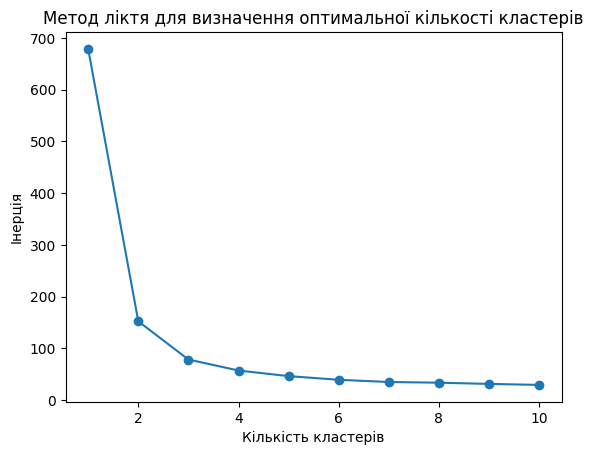

In [13]:
'''Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
Візуалізувати кластери.'''
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Використаємо метод KMeans для знаходження інерції (inertia)
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

# Графік для методу ліктя
plt.plot(range_k, inertia, marker='o')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()


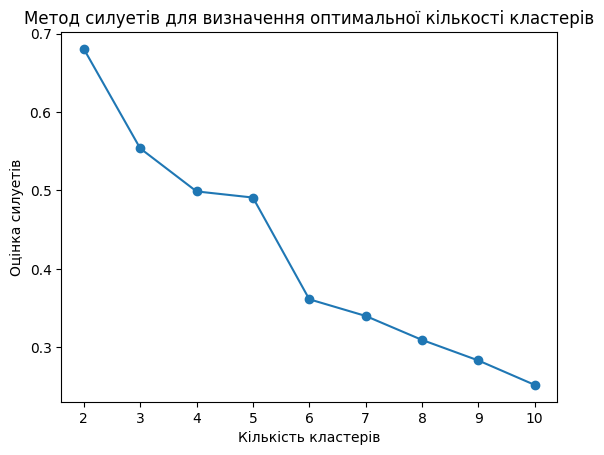

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    score = silhouette_score(iris_df, kmeans.labels_)
    silhouette_scores.append(score)

# Графік для методу силуетів
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Оцінка силуетів')
plt.show()


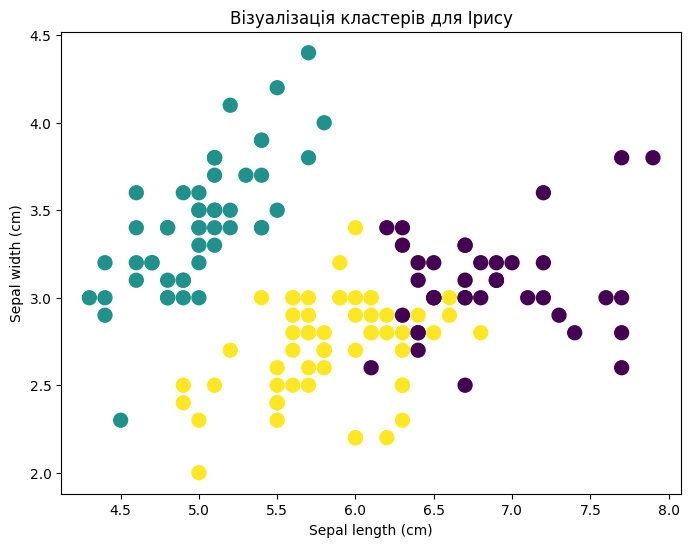

In [15]:
# Виконуємо кластеризацію з оптимальною кількістю кластерів (наприклад, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_df)

# Візуалізуємо кластери за допомогою двох характеристик
plt.figure(figsize=(8, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['cluster'], cmap='viridis', s=100)
plt.title('Візуалізація кластерів для Ірису')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()


In [ ]:
''' Висновки:
Оптимальна кількість кластерів для датасету Ірис була визначена як три, що
узгоджується з реальними біологічними групами квіток. Метод ліктя вказав на
різку зміну інерції після трьох кластерів, що свідчить про те, що додаткові
кластери не додають суттєвої інформації. Метод силуетів також показав найвищу
оцінку для трьох кластерів, що означає, що точки добре групуються всередині
своїх кластерів і чітко відокремлюються від інших.

Кластеризація даних підтвердила існування трьох окремих груп квіток.
Візуалізація кластерів показала чітке розділення між кластерами, особливо при
використанні двох характеристик — довжини та ширини чашолистка. Це свідчить
про те, що метод KMeans успішно розбив квіти на відповідні групи, які можна
легко відрізнити одна від одної.

Загалом, кластеризація за допомогою методів ліктя та силуетів дала чітке
уявлення про структуру даних, що підтверджує хорошу якість поділу та
відповідність кластерів реальним видам квіток.'''

In [16]:
'''Завдання 2.
Завантажити датасет
Реалізувати попередній аналіз даних:
Роздрукувати перші 5 рядків.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [17]:
'''Вивести розмір датасета, типи даних.
Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем.
Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.'''
# Виведення розміру датасета
print("\nРозмір датасета:", df.shape)

# Виведення типів даних
print("\nТипи даних у кожному стовпці:")
print(df.dtypes)


Розмір датасета: (2392, 15)

Типи даних у кожному стовпці:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [18]:
# Перевірка на пропущені значення
print("\nПропущені значення у кожному стовпці:")
print(df.isnull().sum())

# Якщо є пропущені значення, замінюємо їх на середнє за стовпцем
df.fillna(df.mean(), inplace=True)

# Перевіряємо, чи все виправлено
print("\nПісля заміни пропущених значень:")
print(df.isnull().sum())


Пропущені значення у кожному стовпці:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Після заміни пропущених значень:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [19]:
# Перевірка на дублікати
duplicates = df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

# Видаляємо дублікати, якщо вони є
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("\nДублікати видалено.")



Кількість дублікатів: 0


In [20]:
# Виводимо описову статистику
print("\nОписова статистика:")
print(df.describe())



Описова статистика:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971   

In [25]:
'''Побудувати 3 моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
Оцінити моделі.'''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Визначаємо цільову та незалежні змінні
X = df.drop('GPA', axis=1)  # Всі стовпці, окрім цільової змінної
y = df['GPA']  # Цільова змінна

# Перетворюємо категоріальні змінні в числові (за потреби)
X = pd.get_dummies(X, drop_first=True)

# Розділяємо дані на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Визначаємо моделі та їх параметри для GridSearchCV
models = {
    'Лінійна регресія': LinearRegression(),
    'Випадковий ліс': RandomForestRegressor(),
    'Градієнтний бустинг': GradientBoostingRegressor()
}

param_grids = {
    'Лінійна регресія': {},
    'Випадковий ліс': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Градієнтний бустинг': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]}
}

# Словник для зберігання оцінок моделей
scores = {}

# Цикл для навчання та оцінки моделей
for name, model in models.items():
    # Використання GridSearchCV для випадкового лісу та градієнтного бустингу
    if name in param_grids and param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model.fit(X_train, y_train)

    # Прогнозування на тестовій вибірці
    y_pred = best_model.predict(X_test)

    # Оцінка моделі
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    scores[name] = {'RMSE': rmse, 'R²': r2}

    print(f"{name}:\nRMSE: {rmse}\nR²: {r2}\n")

# Виведення результатів
print("Оцінки моделей:")
for name, score in scores.items():
    print(f"{name}: {score}")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Лінійна регресія:
RMSE: 0.18934776753737773
R²: 0.9566438952061618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Випадковий ліс:
RMSE: 0.2232220893722485
R²: 0.9397434563128516

Градієнтний бустинг:
RMSE: 0.19025934287055057
R²: 0.95622543247743

Оцінки моделей:
Лінійна регресія: {'RMSE': 0.18934776753737773, 'R²': 0.9566438952061618}
Випадковий ліс: {'RMSE': 0.2232220893722485, 'R²': 0.9397434563128516}
Градієнтний бустинг: {'RMSE': 0.19025934287055057, 'R²': 0.95622543247743}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


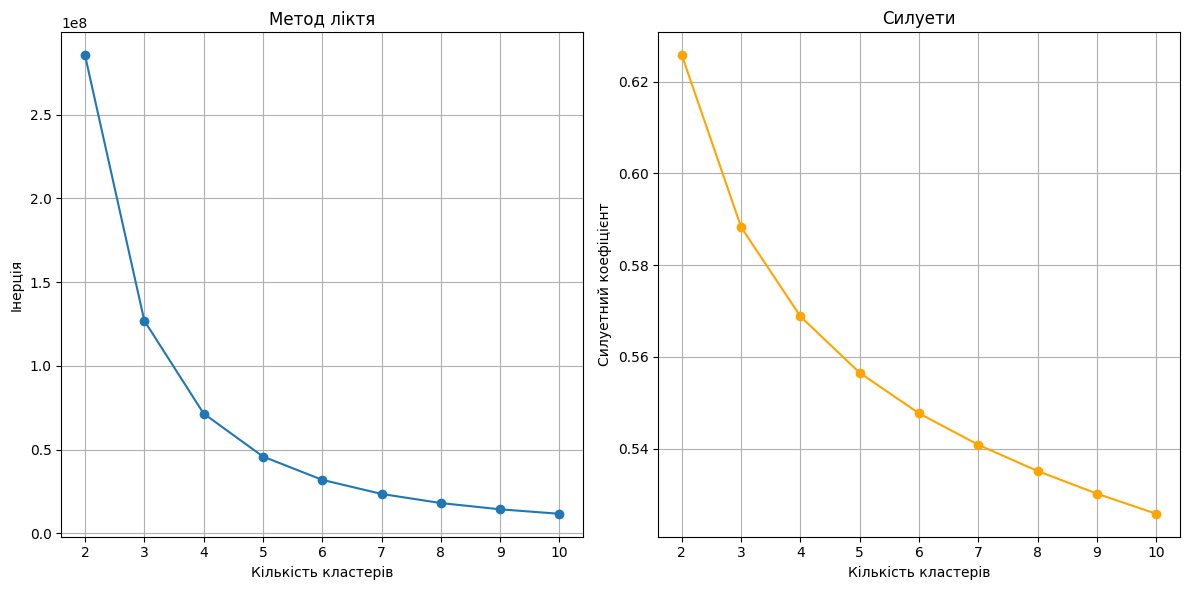

Оптимальна кількість кластерів за силуетом: 2


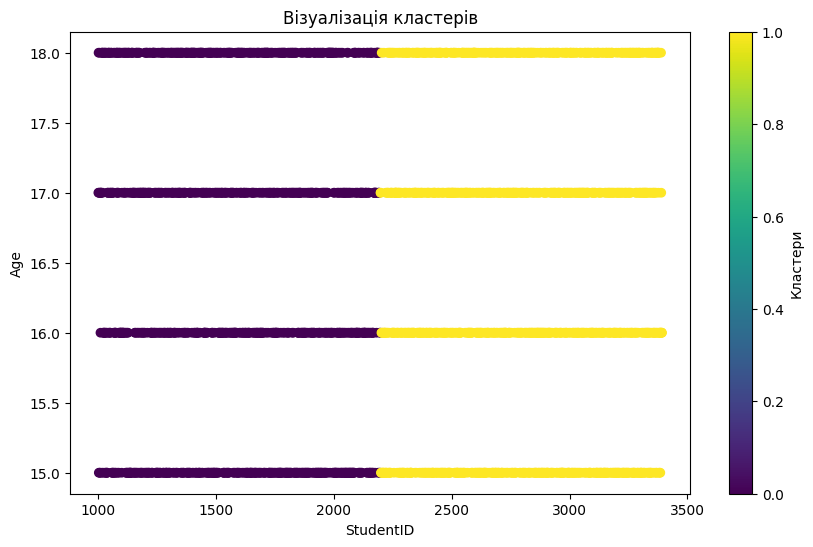

In [26]:
'''Визначити методом ліктя і силуєтів оптимальну кількість кластерів.
Візуалізувати кластери.'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Вибираємо тільки числові стовпці для кластеризації
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
X_cluster = df[numeric_columns]

# Визначаємо оптимальну кількість кластерів за методом ліктя
inertia = []
silhouette_scores = []

# Перебір кількості кластерів від 2 до 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

# Графік методу ліктя
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.xticks(range(2, 11))
plt.grid()

# Графік силуетів
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Силуети')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.xticks(range(2, 11))
plt.grid()

plt.tight_layout()
plt.show()

# Визначення оптимальної кількості кластерів
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальна кількість кластерів за силуетом: {optimal_k}")

# Створення кластерів з оптимальною кількістю кластерів
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(X_cluster)

# Додаємо результати кластеризації до датафрейму
df['Cluster'] = clusters

# Візуалізація кластерів (приклад з 2D-проекцією)
plt.figure(figsize=(10, 6))
plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Візуалізація кластерів')
plt.xlabel(numeric_columns[0])  # Перша числова змінна
plt.ylabel(numeric_columns[1])  # Друга числова змінна
plt.colorbar(label='Кластери')
plt.show()


In [ ]:
'''У результаті аналізу даних за допомогою кластеризації були виявлені різні
групи студентів, які мають схожі характеристики, що можуть впливати на їх
успішність. Використовуючи методи ліктя та силуетів, було визначено оптимальну
кількість кластерів, що дозволило розділити студентів на групи з однорідними
ознаками. Це може допомогти в подальшій роботі, наприклад, в адаптації
навчальних програм та наданні підтримки студентам в залежності від їх потреб.

Кластеризація дозволяє візуалізувати і порівнювати групи, що, у свою чергу,
може стати основою для розробки індивідуальних стратегій навчання та підтримки.
Аналіз показав, що студентів з подібними оцінками, відвідуваністю та участю в
позакласних заходах можна об'єднати в одну категорію, що може вказувати на
певні патерни поведінки та навчання. В подальшому, ці результати можуть бути
використані для вдосконалення освітнього процесу та підвищення ефективності навчання.'''
